<a href="https://colab.research.google.com/github/daisukifh/Iris_UnsupervisedLearning/blob/main/UnsupervisedLearning(IRIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn jupyter kneed

In [ ]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(X.head())
print(y[:5])
print(X.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max         

explained pca ratio =  [0.72962445 0.22850762]
explained pca = 95.81%


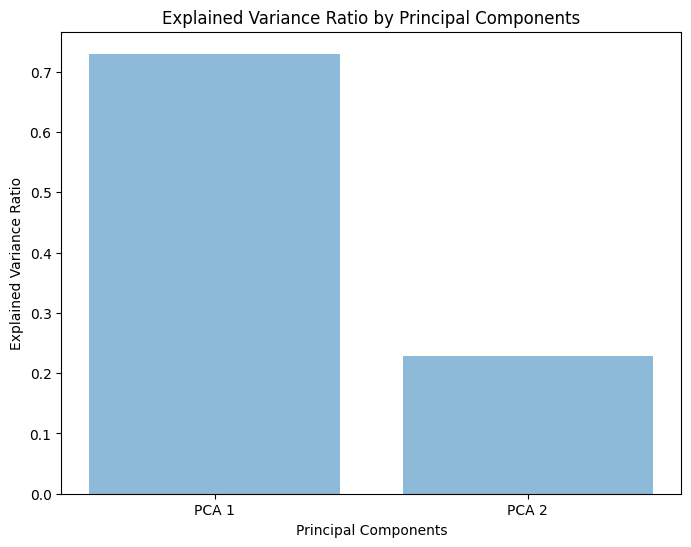

In [ ]:
# 2. Pipeline: Preprocessing + PCA (untuk visualisasi)
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_pca = pca_pipe.fit_transform(X)

# menjelaskan variance ratio PCA
explained_variance = pca_pipe.named_steps['pca'].explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print('explained pca ratio = ', explained_variance)
print(f'explained pca = {total_explained_variance*100:.2f}%')

# buat ke dalam bentuk grafik, batasi hanya untuk PCA 1 dan PCA 2
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance, alpha=0.5, align='center') # Ubah range menjadi (1, 3)
plt.xticks(range(1, 3), ['PCA 1', 'PCA 2']) # Ubah label sumbu x
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [ ]:
# 3. t-SNE (di luar pipeline karena tidak lazim dipakai di dalam)
X_scaled = StandardScaler().fit_transform(X)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)


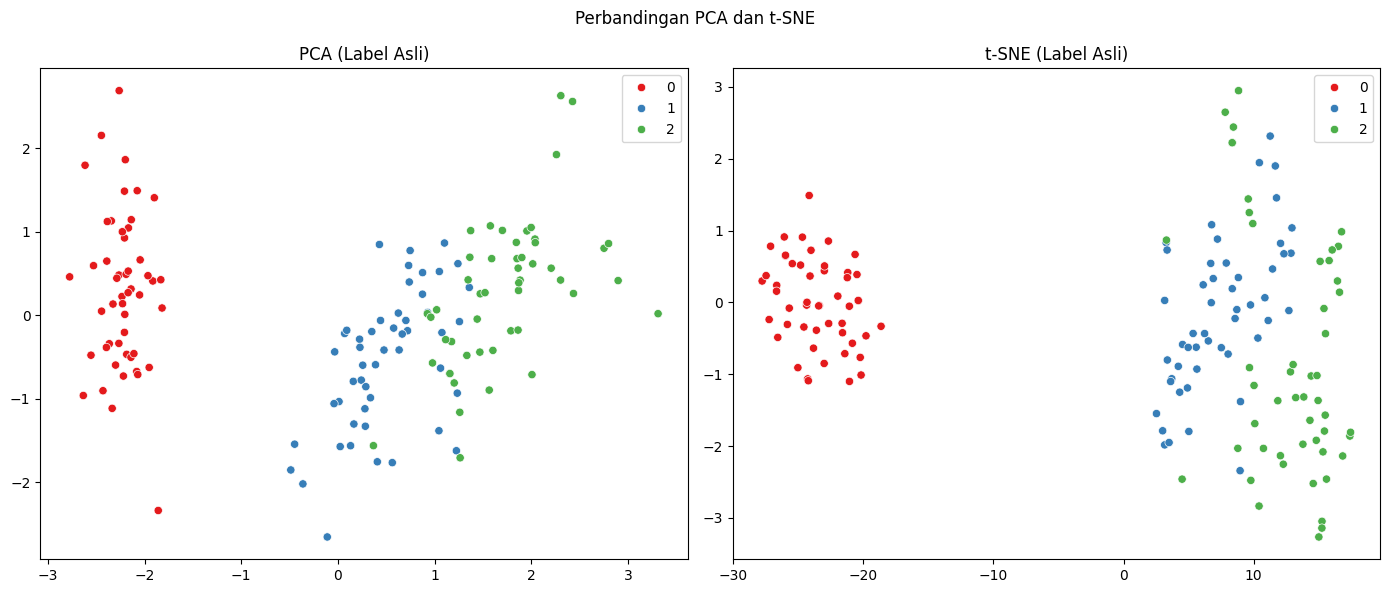

In [ ]:
# 4. Visualisasi PCA vs t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", ax=axes[0])
axes[0].set_title("PCA (Label Asli)")
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="Set1", ax=axes[1])
axes[1].set_title("t-SNE (Label Asli)")
plt.suptitle("Perbandingan PCA dan t-SNE")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Pipeline: Preprocessing + Clustering
cluster_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
cluster_pipe.fit(X)
labels = cluster_pipe.named_steps['kmeans'].labels_

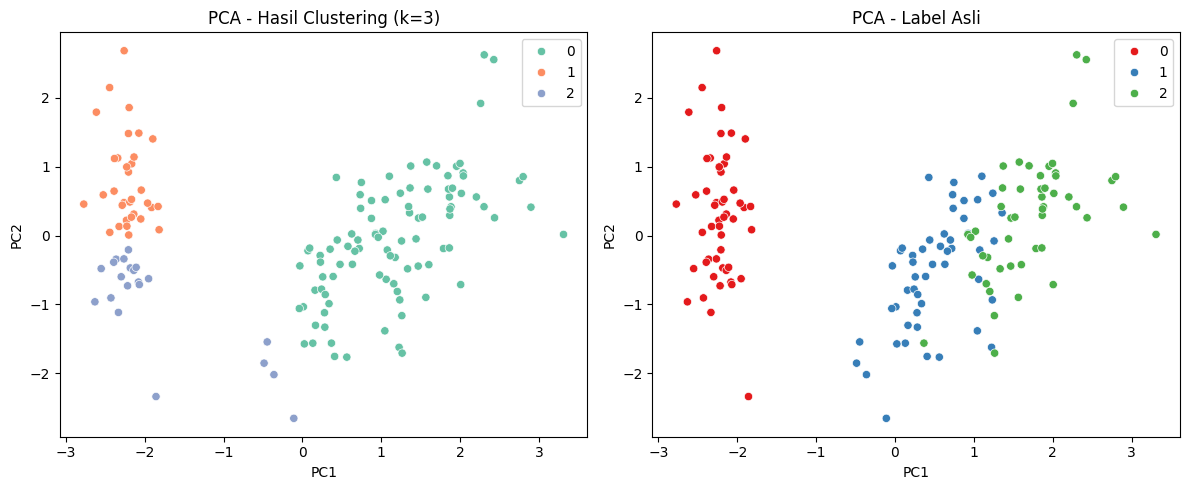

In [ ]:
# 6. Visualisasi Hasil Clustering dan Label Asli (Side-by-Side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

# Hasil Clustering
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', ax=axes[0])
axes[0].set_title("PCA - Hasil Clustering (k=3)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Label Asli
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', ax=axes[1])
axes[1].set_title("PCA - Label Asli")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

In [ ]:
# 7. Evaluasi hasil clustering
sil_score = silhouette_score(X_scaled, labels)
inertia = cluster_pipe.named_steps['kmeans'].inertia_
print(f"Inertia (k=3): {inertia}")
print(f"Silhouette Score (k=3): {sil_score:.4f}")

Inertia (k=3): 191.02473685317958
Silhouette Score (k=3): 0.4799


In [ ]:
# 8. Elbow Method
inertias = []
K = range(2, 10)
for k in K:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    pipe.fit(X)
    inertias.append(pipe.named_steps['kmeans'].inertia_)

knee = KneeLocator(K, inertias, curve='convex', direction='decreasing')

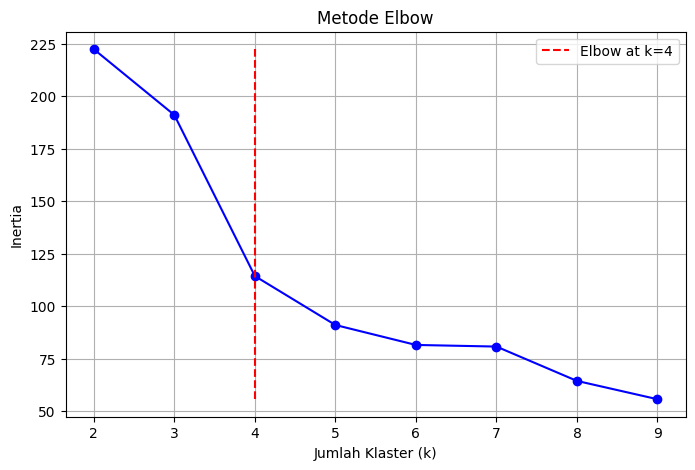

In [ ]:
# 9. Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.vlines(knee.knee, min(inertias), max(inertias), linestyles='dashed', colors='red', label=f"Elbow at k={knee.knee}")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.title("Metode Elbow")
plt.legend()
plt.grid(True)
plt.show()